In [5]:
import sys
sys.path.append('..')

from tools.registry import Registry

DatasetRegistry = Registry()



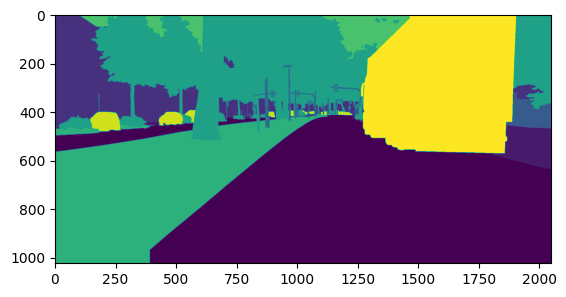

In [25]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 

path = '/home/sss/UOS-SSaS Dropbox/05. Data/00. Benchmarks/01-1. cityscapes_mini/gtFine/train/bochum/bochum_000000_000313_gtFine_labelTrainIds.png'

seg = cv2.imread(path, cv2.IMREAD_UNCHANGED)
mask = seg == 255 
mask = mask.astype(np.uint8)

dst = cv2.inpaint(seg, mask, 0, cv2.INPAINT_NS)
plt.imshow(dst)

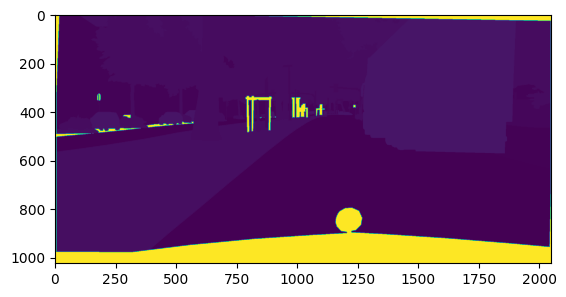

In [26]:
plt.imshow(seg)

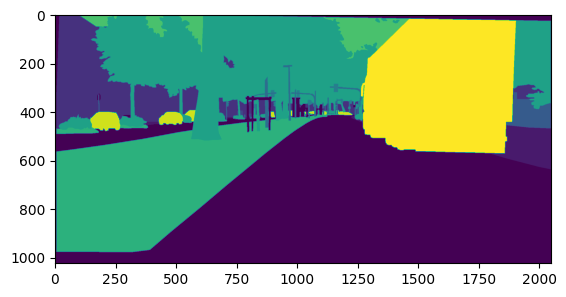

In [19]:
import copy
_seg = copy.deepcopy(seg)
_seg[seg == 255] = 0
plt.imshow(_seg)

In [12]:
import numpy as np


def build_from_cfg(name, **kwargs):
    """Build 

    """
    return globals()[name](**kwargs)

In [15]:
import sys 
sys.path.append('../')

from datasets.cityscapes import CityscapesDataset
from pipelines.transforms import RandomRescale, RandomCrop

root_dir = '/home/sss/#data/01-1. cityscapes_mini'


composed_transforms = transforms.Compose([
    RandomRescale((600, 800)),
    RandomCrop((400, 800))
])

name = 'CityscapesDataset'

kwargs = {}
kwargs['transform']=composed_transforms
kwargs['root_dir']=root_dir

dataset = build_from_cfg(name, **kwargs)


{'transform': Compose(
), 'root_dir': '/home/sss/#data/01-1. cityscapes_mini'}
738


{'image': array([[[ 12,  18,  19],
         [ 11,  18,  19],
         [ 12,  19,  19],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[ 12,  18,  19],
         [ 11,  18,  20],
         [ 13,  20,  20],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[ 12,  19,  20],
         [ 11,  18,  19],
         [ 13,  19,  20],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[131, 151, 134],
         [130, 151, 135],
         [130, 151, 137],
         ...,
         [ 23,  33,  33],
         [ 23,  33,  32],
         [ 23,  33,  31]],
 
        [[130, 150, 133],
         [130, 149, 134],
         [129, 149, 135],
         ...,
         [ 26,  35,  35],
         [ 25,  35,  34],
         [ 24,  34,  34]],
 
        [[128, 148, 135],
         [127, 147, 133],
         [127, 147, 134],
         ...,
         [ 29,  41,

In [7]:


from datasets.cityscapes import CityscapesDataset
from pipelines.transforms import RandomRescale, RandomCrop
from torchvision import transforms

import matplotlib.pyplot as plt 


composed_transforms = transforms.Compose([
    RandomRescale((600, 800)),
    RandomCrop((400, 800))
])


dataset = CityscapesDataset(root_dir, transform=composed_transforms)


In [ ]:


from datasets.cityscapes import CityscapesDataset
from pipelines.transforms import RandomRescale, RandomCrop
from torchvision import transforms

import matplotlib.pyplot as plt 




composed_transforms = transforms.Compose([
    RandomRescale((600, 800)),
    RandomCrop((400, 800))
])

dataset = CityscapesDataset(root_dir, transform=composed_transforms)


In [1]:
import sys 
sys.path.append('../')


root_dir = '/home/user/UOS-SSaS Dropbox/05. Data/00. Benchmarks/01-1. cityscapes_mini'


cfg = dict(
    model=dict(
        encoder=dict(type='CGNet'),
        decoder=None,
        head=None
        ),
    dataset=dict(type='CityscapesDataset', root_dir=root_dir, ),
    loss=dict(type='CrossEntropyLoss'),
    batch_size=2,
    pipelilnes = [
        
    ]
)


In [20]:
from importlib import import_module

from datasets import *

_input = dict(root_dir = '123')
globals()['CityscapesDataset'](**_input)
    

In [9]:
import torch 

gt = torch.tensor([
    [0, 0, 0, 0],
    [0, 1, 1, 4],
    [5, 5, 2, 4],
    [5, 3, 3, 4]
]) 

pred = torch.tensor([
    [0, 0, 0, 0],
    [0, 0, 1, 1],
    [5, 5, 2, 4],
    [5, 3, 3, 4]
])

category_vectors = gt + pred * 6 

# category_vectors = torch.cat(category_vectors)

num_classes = 6

import numpy as np 
confusion_matrix = np.zeros((num_classes, num_classes), dtype=np.int64)

category_vectors = category_vectors.detach().cpu().numpy()
for i in range(num_classes ** 2):
    row, col = i // num_classes, i % num_classes
    _cat = category_vectors == i
    confusion_matrix[row, col] = np.count_nonzero(_cat) 

IoUs = []
for i in range(num_classes): 
    intersection = confusion_matrix[i, i]
    print(intersection)
    union = np.sum(confusion_matrix[i, :]) + np.sum(confusion_matrix[:, i]) - confusion_matrix[i, i]
    print(union)
    IoUs.append(intersection / union)

mIoU = np.mean(IoUs)
print(IoUs)
print(mIoU)
print(confusion_matrix)

5
6
1
3
1
1
2
2
2
3
3
3
[0.8333333333333334, 0.3333333333333333, 1.0, 1.0, 0.6666666666666666, 1.0]
0.8055555555555557
[[5 1 0 0 0 0]
 [0 1 0 0 1 0]
 [0 0 1 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 3]]


In [13]:
2/3

0.6666666666666666

In [8]:
import 

def build_model(dict):
    """
    Args: 
        dict (encoder, decoder, head)

    Returns: 
        model (torch.nn.Module)
    """
    encoder = 
    decoder = 
    header =  

    return model_wrapper(encoder, decoder, header)

def build_dataset(dict):

    

    return None 

def build_pipeline():
    return None 

def build_loss():
    return None 

In [9]:
result = {}

for key, value in cfg.items():

    if key == 'model':
        result[key] = build_model(value)

    elif key == 'dataset':
        result[key] = build_dataset()

    elif key == 'pipeline':
        result[key] = build_pipeline()

    elif key == 'loss':
        result[key] = build_loss()
        
    else:
        result[key] = value

    print(key, value)

model {'encoder': {'type': 'CGNet'}, 'decoder': None, 'head': None}


In [18]:

import sys 
sys.path.append('../')

from importlib import import_module

from pipelines.transforms import RandomRescale, RandomCrop, Normalization

import torch
from torchvision import transforms

def import_dict(module_name):
    
    
    module = import_module(module_name[0])
    return getattr(module, module_name[1])

dataset = import_dict(("datasets", "CityscapesDataset"))

root_dir = '/home/user/UOS-SSaS Dropbox/05. Data/00. Benchmarks/01-1. cityscapes_mini'

batch_size = 2

composed_transforms = transforms.Compose([
    RandomRescale((600, 800)),
    RandomCrop((400, 800)),
    Normalization(mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375])
])

_input_dict = dict(root_dir = root_dir, transform=composed_transforms)

train_set = dataset(**_input_dict)

trainloader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

In [11]:
"""
Test Cityscapes Dataset + Transform RandomRescale
"""
import sys 
sys.path.append('../')

from datasets.cityscapes import CityscapesDataset
from pipelines.transforms import RandomRescale, RandomCrop, Normalization
from torchvision import transforms

import torch

import numpy as np 

import matplotlib.pyplot as plt 


root_dir = '/home/user/UOS-SSaS Dropbox/05. Data/00. Benchmarks/01-1. cityscapes_mini'

batch_size = 2

composed_transforms = transforms.Compose([
    RandomRescale((600, 800)),
    RandomCrop((400, 800)),
    Normalization(mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375])
])

train_set = CityscapesDataset(root_dir, transform=composed_transforms)

trainloader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

model = 

mean: [[123.675 116.28  103.53 ]], stdinv: [[0.01712475 0.017507   0.01742919]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-0.5814965
2.64
-1.7411594
0.48479712


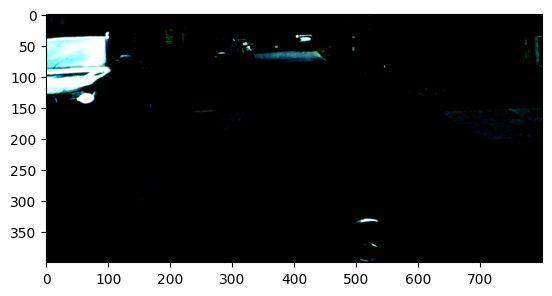

In [19]:
"""
Test Cityscapes Dataset + Transform RandomRescale
"""
import sys 
sys.path.append('../')

from datasets.cityscapes import CityscapesDataset
from pipelines.transforms import RandomRescale, RandomCrop, Normalization
from torchvision import transforms

import numpy as np 

import matplotlib.pyplot as plt 


root_dir = '/home/user/UOS-SSaS Dropbox/05. Data/00. Benchmarks/01-1. cityscapes_mini'

composed_transforms = transforms.Compose([
    RandomRescale((600, 800)),
    RandomCrop((400, 800)),
    Normalization(mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375])
])


_input_dict = dict(root_dir = root_dir, transform=composed_transforms)

dataset = CityscapesDataset(**_input_dict)

idx = 10

sample = dataset[idx]

# to do: make it subplot 
plt.imshow(sample['image'])

print(np.mean(sample['image']))
print(np.max(sample['image']))
print(np.min(sample['image']))
print(np.std(sample['image']))


Image shape is: (400, 800, 3)


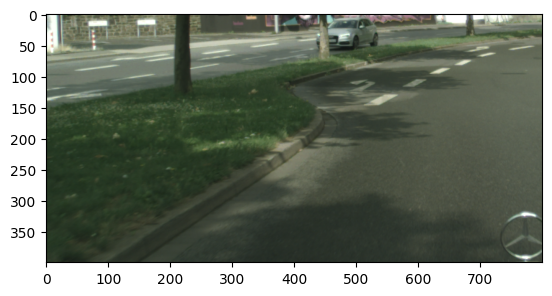

In [35]:
"""
Test Cityscapes Dataset + Transform RandomRescale
"""
import sys 
sys.path.append('../')

from datasets.cityscapes import CityscapesDataset
from pipelines.transforms import RandomRescale, RandomCrop
from torchvision import transforms

import matplotlib.pyplot as plt 


root_dir = '/home/user/UOS-SSaS Dropbox/05. Data/00. Benchmarks/01-1. cityscapes_mini'

composed_transforms = transforms.Compose([
    RandomRescale((600, 800)),
    RandomCrop((400, 800))
])

dataset = CityscapesDataset(root_dir, transform=composed_transforms)

idx = 1

sample = dataset[idx]

# to do: make it subplot 
plt.imshow(sample['image'])

image_shape = sample['image'].shape

print(f'Image shape is: {image_shape}')

Image shape is: (457, 914, 3)


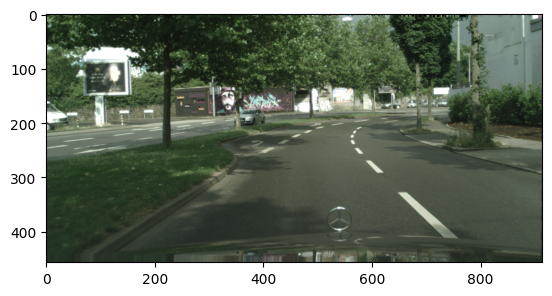

In [34]:
"""
Test Cityscapes Dataset + Transform RandomRescale
"""
import sys 
sys.path.append('../')

from datasets.cityscapes import CityscapesDataset
from pipelines.transforms import RandomRescale
from torchvision import transforms

import matplotlib.pyplot as plt 


root_dir = '/home/user/UOS-SSaS Dropbox/05. Data/00. Benchmarks/01-1. cityscapes_mini'

composed_transforms = transforms.Compose([RandomRescale((400, 512))])
dataset = CityscapesDataset(root_dir, transform=composed_transforms)

idx = 1

sample = dataset[idx]

# to do: make it subplot 
plt.imshow(sample['image'])

image_shape = sample['image'].shape

print(f'Image shape is: {image_shape}')

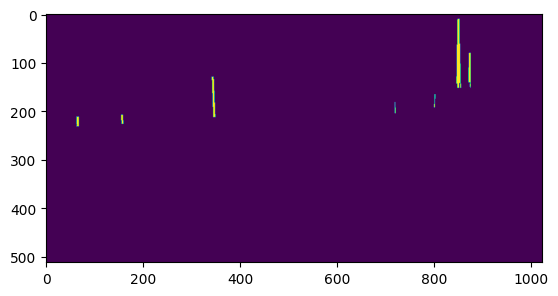

In [11]:
"""
Test Cityscapes Dataset + Transform Rescale
"""
import sys 
sys.path.append('../')

from datasets.cityscapes import CityscapesDataset
from pipelines.transforms import Rescale
from torchvision import transforms

import matplotlib.pyplot as plt 


root_dir = '/home/user/UOS-SSaS Dropbox/05. Data/00. Benchmarks/01-1. cityscapes_mini'

composed_transforms = transforms.Compose([Rescale(512)])
dataset = CityscapesDataset(root_dir, transform=composed_transforms)

idx = 1

sample = dataset[idx]

# to do: make it subplot 
plt.imshow(sample['image'])
plt.imshow(sample['segmap'] == 5)

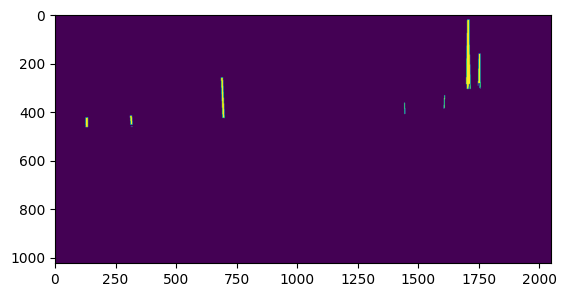

In [1]:
"""
Test Cityscapes Dataset 
"""
import sys 
sys.path.append('../')

from datasets.cityscapes import CityscapesDataset

import matplotlib.pyplot as plt 

root_dir = '/home/user/UOS-SSaS Dropbox/05. Data/00. Benchmarks/01-1. cityscapes_mini'
dataset = CityscapesDataset(root_dir)

idx = 1

sample = dataset[idx]

# to do: make it subplot 
plt.imshow(sample['image'])
plt.imshow(sample['segmap'] == 5)